# Homework 4
## CSE 802
## David Rackerby

1. The IMOX dataset consists of 192 8-dimensional patterns pertaining to four classes (digital characters
‘I’, ‘M’, ‘O’ and ‘X’). There are 48 patterns per class. The 8 features correspond to the distance of a
character to the (a) upper left boundary, (b) lower right boundary, (c) upper right boundary, (d) lower
left boundary, (e) middle left boundary, (f) middle right boundary, (g) middle upper boundary, and (h)
middle lower boundary. Note that the class labels (1, 2, 3 or 4) are indicated at the end of every pattern.

(a) [4 points] Write a program to project these 8-dimensional points onto a two dimensional plane
using PCA (the top 2 eigenvectors). Report the two projection vectors estimated by the technique.
Plot the entire dataset in two dimensions using these projection vectors. Use different markers to
distinguish the patterns belonging to different classes.

PCA projection vectors (column vectors):
[[-0.21534345  0.01447815]
 [-0.40181854 -0.08829337]
 [-0.27405584 -0.16398584]
 [-0.00509032 -0.05035686]
 [-0.37641963 -0.34025534]
 [-0.50488797 -0.47580712]
 [ 0.39970198 -0.55720747]
 [ 0.4008382  -0.55670568]]


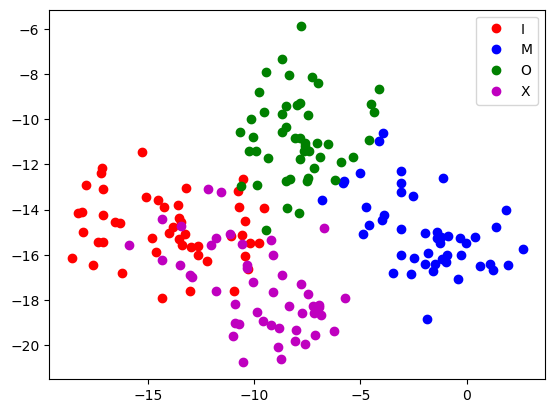

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

imox_data = pd.read_fwf('imox_data.txt', header=None)
labels = imox_data[8]
imox_unlabeled = imox_data.drop(labels=8, axis=1)

global_mean = imox_unlabeled.mean(axis=0)

# Recall that Covariance_matrix = Scatter_Matrix / No. samples
global_scatter = imox_unlabeled.cov() * len(imox_unlabeled.index)

eig_val, eig_vec = np.linalg.eig(global_scatter.to_numpy())

# eig_vec[:, i] corresponds to eig_val[i], so take transpose
val_vec_pairs = list(zip(eig_val, eig_vec.T))

# Sort by eigenvalue in descending order
val_vec_pairs.sort(reverse=True, key=lambda pair: pair[0])

top_2_vecs = val_vec_pairs[:2]
eigenmatrix = np.vstack((top_2_vecs[0][1], top_2_vecs[1][1]))
print(f'PCA projection vectors (column vectors):\n{eigenmatrix.T}')

projected_points = []
for i, vec in enumerate(imox_unlabeled.to_numpy()):
    projected_points.append((labels[i], eigenmatrix @ vec))

I_points = np.array([vec for i, vec in projected_points if i == 1])
M_points = np.array([vec for i, vec in projected_points if i == 2])
O_points = np.array([vec for i, vec in projected_points if i == 3])
X_points = np.array([vec for i, vec in projected_points if i == 4])
plt.plot(I_points[:, 0], I_points[:, 1], 'ro', label='I')
plt.plot(M_points[:, 0], M_points[:, 1], 'bo', label='M')
plt.plot(O_points[:, 0], O_points[:, 1], 'go', label='O')
plt.plot(X_points[:, 0], X_points[:, 1], 'mo', label='X')
plt.legend()
plt.show()


(b) [4 points] Write a program to project these 8-dimensional points onto a two dimensional plane
using MDA (the top 2 eigenvectors). Report the two projection vectors estimated by the technique.
Plot the entire dataset in two dimensions using these projection vectors. Use different markers to
distinguish the patterns belonging to different classes.

MDA projection vectors (column vectors):
[[ 0.03537495  0.0236504 ]
 [-0.07357227  0.00670714]
 [-0.04516005 -0.03530296]
 [ 0.05069574 -0.04701878]
 [ 0.54583039  0.54747389]
 [ 0.82394195  0.00165336]
 [ 0.03770017  0.48649949]
 [-0.10243922  0.67788381]]


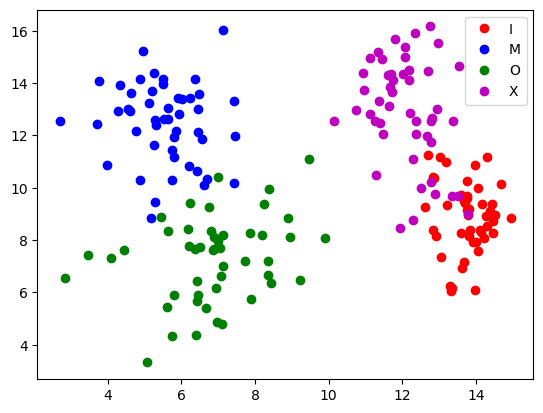

In [2]:
I_data = imox_data[imox_data[8] == 1].drop(labels=8, axis=1)
M_data = imox_data[imox_data[8] == 2].drop(labels=8, axis=1)
O_data = imox_data[imox_data[8] == 3].drop(labels=8, axis=1)
X_data = imox_data[imox_data[8] == 4].drop(labels=8, axis=1)

I_mean = I_data.mean(axis=0)
M_mean = M_data.mean(axis=0)
O_mean = O_data.mean(axis=0)
X_mean = X_data.mean(axis=0)

I_scatter = I_data.cov() * len(I_data.index)
M_scatter = M_data.cov() * len(M_data.index)
O_scatter = O_data.cov() * len(O_data.index)
X_scatter = X_data.cov() * len(X_data.index)

within_class_scatter = I_scatter + M_scatter + O_scatter + X_scatter

between_class_scatter = np.zeros((len(global_mean), len(global_mean)))

for data, mean in [(I_data, I_mean), (M_data, M_mean), (O_data, O_mean), (X_data, X_mean)]:
    x = np.atleast_2d(mean - global_mean)
    between_class_scatter += len(data.index) * (x.T @ x)

eig_val, eig_vec = np.linalg.eig(np.linalg.inv(within_class_scatter) 
                                 @ between_class_scatter )
val_vec_pairs = list(zip(eig_val, eig_vec.T))
val_vec_pairs.sort(reverse=True, key=lambda pair: pair[0])

top_2_vecs = val_vec_pairs[:2]

# Imaginary parts are all 0i
eigenmatrix = np.vstack((top_2_vecs[0][1], top_2_vecs[1][1])).real
print(f'MDA projection vectors (column vectors):\n{eigenmatrix.T}')

projected_points = []
for i, vec in enumerate(imox_unlabeled.to_numpy()):
    projected_points.append((labels[i], eigenmatrix @ vec))

I_points = np.array([vec for i, vec in projected_points if i == 1])
M_points = np.array([vec for i, vec in projected_points if i == 2])
O_points = np.array([vec for i, vec in projected_points if i == 3])
X_points = np.array([vec for i, vec in projected_points if i == 4])
plt.plot(I_points[:, 0], I_points[:, 1], 'ro', label='I')
plt.plot(M_points[:, 0], M_points[:, 1], 'bo', label='M')
plt.plot(O_points[:, 0], O_points[:, 1], 'go', label='O')
plt.plot(X_points[:, 0], X_points[:, 1], 'mo', label='X')
plt.legend()
plt.show()

(c) [2 points] Discuss the differences between the PCA and MDA projection vectors.

MDA, unlike the PCA, considered class labels and incorporated inter-class variation into its eigenmatrix. The projected points are much more separable using MDA than compared to PCA. However, there is still some considerable overlap with both dimensionality reduction techniques.

2. [10 points] Based on the notation developed in class, write down the Sequential Backward Selection
(SBS) algorithm and the Sequential Floating Backward Selection (SFBS) algorithm.

**Sequential Backward Selection**

Input: $Y = \{ y_j | j = 1...D\}$

Output: $X_k = \{x_j | j = 1...k, x_j \in Y\}$,  $k = 0...D$

Initialize: $k := D, X_D := Y$

Repeat until termination:

$x^- := \underset{x \in X_k}{\mathrm{arg max}}$ $J(X_k - x)$

$X_{k-1} := X_k - x^-$

$k := k-1$

Termination: Stop when $k = $ number of features desired.

**Sequential Floating Backward Selection**

Input: $Y = \{ y_j | j = 1...D\}$

Output: $X_k = \{x_j | j = 1...k, x_j \in Y\}$,  $k = 0...D$

Initialize: $k := D, X_D := Y$

Repeat until termination:

**Step 1 (exclusion)**

$x^- := \underset{x \in X_k}{\mathrm{arg max}}$ $J(X_k - x)$

$X_{k-1} := X_k - x^-$

$k := k-1$

**Step 2 (conditional inclusion)**

$x^+ := \underset{x \in Y-X_k}{\mathrm{arg max}}$ $J(X_k + x)$

if $J(X_k + x^+) > J(X_{k+1})$ then

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $X_{k+1} := X_k + x^+$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k := k+1$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **goto step 2**

else

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**goto step 1**

Termination: Stop when $k = $ number of features desired.

3. [20 points] Consider a dataset in which every pattern is represented by a set of 15 features. The goal
is to identify a subset of 5 features or less that gives the best performance on this dataset. How many
feature subsets would each of the following feature selection algorithms consider before identifying a
solution (i.e., the number of times the criterion function, J (.), will be invoked)?

In all of these algorithms, the termination rule is to stop when *k* equals the number of features required (specifically, when the chosen non-empty subsets of the input with size $\leq$ 5 are all considered).

(a) SFS;

**SFS** will consider 15 subsets of size 1, 14 subsets of size 2, 13 subsets of size 3, 12 subsets of size 4, and 11 subsets of size 5. Therefore, the criterion function will be invoked 15 + 14 + 13 + 12 + 11 = 65 times.

(b) Plus-l-take-away-r with (l, r)=(5, 3);

We alternate between SFS and SBS for as long as it's possible to get consider subsets of size $\leq 5$.
**L:**
(k = 1, 15)
(k = 2, 14)
(k = 3, 13)
(k = 4, 12)
(k = 5, 11)
**R:**
(k = 4, 5)
(k = 3, 4)
(k = 2, 3)
**L:**
(k = 3, 13)
(k = 4, 12)
(k = 5, 11)
(k = 6, 10)
(k = 7, 9)
**R:**
(k = 6, 7)
(k = 5, 6)
(k = 4, 5)
**L:**
(k = 5, 11).
From here, k increases such that k = 5 is never considered again. We now sum over every instance the criterion function was invoked:
15 + 14 + 13 + 12 + 11 + 5 + 4 + 3 + 13 + 12 + 11 + 10 + 9 + 7 + 6 + 5 + 11 = 161 invocations.

(c) SBS;

**SBS** will consider one subset each of length $\leq 15$. The sum of the first 15 natural numbers is 15(16) / 2 = 120 invocations.

(d) Exhaustive Search

If the exhaustive search algorithm first considers all $2^{15} - 1$ possible subsets and *then* finds the best subset with size $\leq 5$, then it invokes the criterion function $2^{15} - 1$ times. However, if we assume that the exhaustive search algorithm first considers only subsets of size $\leq 5$, then the criterion function will be invoked (15 choose 1) + (15 choose 2) + (15 choose 3) + (15 choose 4) + (15 choose 5) = 15 + 105 + 455 + 1365 + 3003 = 4943 times.

4. The Parzen window scheme is used to compute the density at a point. However, in low dimensional
problems, it can be used to estimate the density at multiple discrete points thereby providing insight
into the overall shape of the distribution. This problem demonstrates this.
Generate 100 random training points from each of the following two distributions: N(20,5) and N(35,5).
Write a program that employs the Parzen window technique with a Gaussian kernel to estimate the
density, $\hat{p(x)}$, using all 200 points. Note that this density conforms to a single bimodal distribution.

(a) [10 points] Plot the estimated density function for each of the following window widths: h =
0.01, 0.1, 1, 10. [Note: You can estimate the density at discrete values of x in the [0,55] interval
with a step-size of 1.]

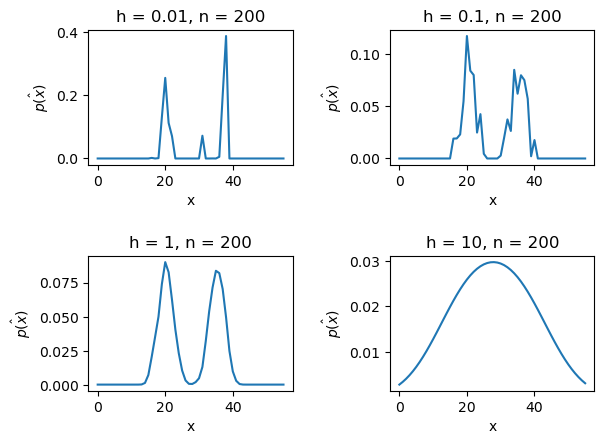

In [3]:
first_100 = np.random.normal(loc=20, scale=5 ** 0.5, size=100)
second_100 = np.random.normal(loc=35, scale=5 ** 0.5, size=100)

widths = [0.01, 0.1, 1, 10]

def phi(u: np.ndarray) -> int:
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * np.dot(u, u))

def parzen_window_estimation(point: np.ndarray, h: float, data: np.ndarray):
    est = 0
    for x in data:
        u = (point - x) / h
        est += phi(u)
    est /= len(data) * (h ** data.ndim)
    return est

test = range(56)
data = np.concatenate([first_100, second_100])
for i, h in enumerate(widths):
    estimated_density = [parzen_window_estimation(test_value, h, data)
                         for test_value in test]
    plt.subplot(2, 2, i+1)
    plt.plot(test, estimated_density)
    plt.title(f'h = {h}, n = {len(data)}')
    plt.xlabel('x')
    plt.ylabel(r'$\hat{p(x)}$')
    plt.tight_layout(pad=2)
    


(b) [10 points] Repeat the above after generating 500 training points from each of the two distributions, and then 1,000 training points from each of the two distributions.

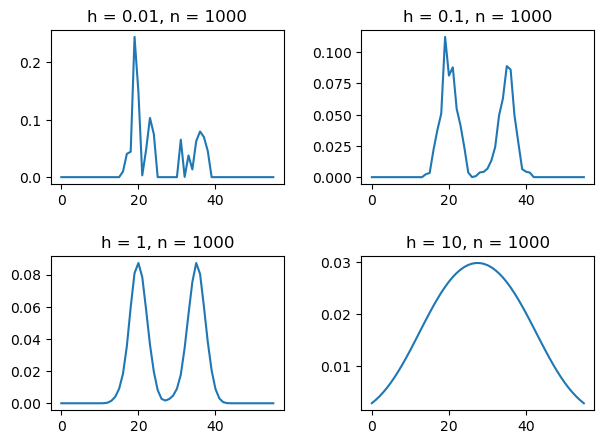

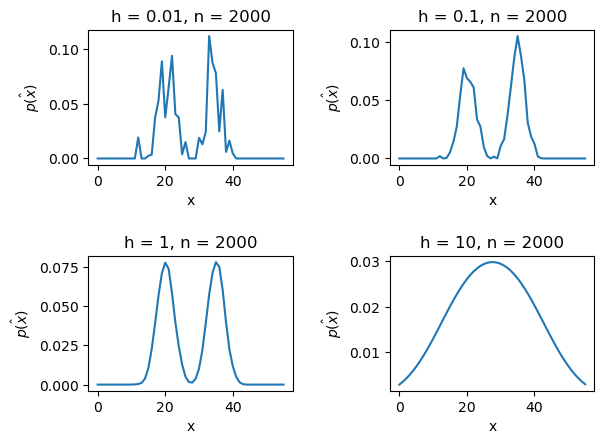

In [4]:
first_500 = np.random.normal(loc=20, scale=5 ** 0.5, size=500)
second_500 = np.random.normal(loc=35, scale=5 ** 0.5, size=500)

data = np.concatenate([first_500, second_500])
for i, h in enumerate(widths):
    estimated_density = [parzen_window_estimation(test_value, h, data)
                         for test_value in test]
    plt.subplot(2, 2, i+1)
    plt.plot(test, estimated_density)
    plt.title(f'h = {h}, n = {len(data)}')
    plt.tight_layout(pad=2)

plt.show()

first_1000 = np.random.normal(loc=20, scale=5 ** 0.5, size=1000)
second_1000 = np.random.normal(loc=35, scale=5 ** 0.5, size=1000)

data = np.concatenate([first_1000, second_1000])
for i, h in enumerate(widths):
    estimated_density = [parzen_window_estimation(test_value, h, data)
                         for test_value in test]
    plt.subplot(2, 2, i+1)
    plt.plot(test, estimated_density)
    plt.title(f'h = {h}, n = {len(data)}')
    plt.xlabel('x')
    plt.ylabel(r'$\hat{p(x)}$')
    plt.tight_layout(pad=2)

(c) [5 points] Discuss how the estimated density changes as a function of the window width and the
number of training points.

As the width (and by extension, the volume) increases, the estimated distribution curves smoothen. However, upon increasing it past a certain point, the estimation suffers and instead tends to a unimodal distribution. As the number of training samples increase, we see a better estimation of the true bimodal distribution, with less sensitivity to small changes in the training data.

5. Consider the dataset available here. It consists of two-dimensional patterns, x =[x1, x2]^t , pertaining
to 3 classes (ω1, ω2, ω3). The feature values are indicated in the first two columns while the class
labels are specified in the last column. The priors of all 3 classes are the same and a 0-1 loss function
is assumed. Partition this dataset into a training set (the first 250 patterns of each class) and a test set
(the remaining 250 patterns of each class).

(a) [10 points] Let
p([x_1, x_2]^t | ω1) ~ N([0, 0]^t, 4I)
p([x_1, x_2]^t | ω2) ~ N([10, 0]^t, 4I)
p([x_1, x_2]^t | ω3) ~ N([5, 5]^t, 5I)
where I is the 2x2 identity matrix. What is the error rate on the test set when the Bayesian decision rule is employed for classification? Report the confusion matrix as well.

In [5]:
from sklearn import metrics

q5_data = pd.read_csv('hw4_data.txt', sep=' ', header=None)
class_1_data = q5_data[q5_data[2] == 1].drop(labels=2, axis=1)
class_2_data = q5_data[q5_data[2] == 2].drop(labels=2, axis=1)
class_3_data = q5_data[q5_data[2] == 3].drop(labels=2, axis=1)

class_1_training = class_1_data.iloc[:250]
class_1_test = class_1_data.iloc[250:]

class_2_training = class_2_data.iloc[:250]
class_2_test = class_2_data.iloc[250:]

class_3_training = class_3_data.iloc[:250]
class_3_test = class_3_data.iloc[250:]

class_1_mean, class_1_cov = np.array([0, 0]), 4 * np.identity(2)
class_2_mean, class_2_cov = np.array([10, 0]), 4 * np.identity(2)
class_3_mean, class_3_cov = np.array([5, 5]), 5 * np.identity(2)

def multivariate_gaussian_pdf(*, x: np.ndarray, mu: np.ndarray, sigma: np.ndarray) -> np.float64:
    return np.exp(-0.5 * ((x - mu).T @ np.linalg.inv(sigma) @ (x - mu))) / (((2 * np.pi) ** (len(x) / 2)) * (np.linalg.det(sigma) ** 0.5))

def classify(x: np.ndarray):
    w1_at_x = multivariate_gaussian_pdf(x=x, mu=class_1_mean, sigma=class_1_cov)
    w2_at_x = multivariate_gaussian_pdf(x=x, mu=class_2_mean, sigma=class_2_cov)
    w3_at_x = multivariate_gaussian_pdf(x=x, mu=class_3_mean, sigma=class_3_cov)

    # Finds the (class, density) pair with maximum density and returns the respective class
    class_decision = max(enumerate([w1_at_x, w2_at_x, w3_at_x]), key=lambda p: p[1])[0]
    return class_decision


decisions = [(0, classify(x)) for x in class_1_test.to_numpy()] + \
            [(1, classify(x)) for x in class_2_test.to_numpy()] + \
            [(2, classify(x)) for x in class_3_test.to_numpy()]

decisions = np.array(decisions)
confusion_matrix = metrics.confusion_matrix(decisions[:, 0], decisions[:, 1])

misclassifcations = 0
for ground_truth, predicted in decisions:
    if ground_truth != predicted:
        misclassifcations += 1

empirical_error_rate = misclassifcations / len(decisions)
print(f"Confusion matrix of three classes:\n{confusion_matrix}")
print(f"Empirical error rate: {empirical_error_rate}")

Confusion matrix of three classes:
[[230   4  16]
 [  1 235  14]
 [  9  11 230]]
Empirical error rate: 0.07333333333333333


(b) [10 points] Suppose p([x1, x2]t |ωi ) ∼ N (μi , Σi ), i = 1, 2, 3, where the μi ’s and Σi ’s are unknown.
Use the training set to compute the MLE of the μi ’s and the Σi ’s. What is the error rate on the
test set when the Bayes decision rule using the estimated parameters is employed for classification?
Report the confusion matrix as well.

In [6]:
class_1_mean = class_1_training.mean(axis=0)
class_2_mean = class_2_training.mean(axis=0)
class_3_mean = class_3_training.mean(axis=0)

class_1_cov = class_1_training.cov()
class_2_cov = class_2_training.cov()
class_3_cov = class_3_training.cov()

decisions = [(0, classify(x)) for x in class_1_test.to_numpy()] + \
            [(1, classify(x)) for x in class_2_test.to_numpy()] + \
            [(2, classify(x)) for x in class_3_test.to_numpy()]

decisions = np.array(decisions)
confusion_matrix = metrics.confusion_matrix(decisions[:, 0], decisions[:, 1])

misclassifcations = 0
for ground_truth, predicted in decisions:
    if ground_truth != predicted:
        misclassifcations += 1

empirical_error_rate = misclassifcations / len(decisions)
print(f"Confusion matrix of three classes:\n{confusion_matrix}")
print(f"Empirical error rate: {empirical_error_rate}")

Confusion matrix of three classes:
[[231   4  15]
 [  1 238  11]
 [ 12  13 225]]
Empirical error rate: 0.07466666666666667


(c) [10 points] Suppose the form of the distributions of p([x1, x2]t |ωi ), i = 1, 2, 3 is unknown. Assume
that the training dataset can be used to estimate the density at a point using the Parzen window
technique (a spherical Gaussian kernel with h = 1). What is the error rate on the test set when
the Bayes decision rule is employed for classification? Report the confusion matrix as well.

In [7]:
def classify_parzen(x: np.ndarray):
    w1_at_x = parzen_window_estimation(point=x, h=1, data=class_1_training.to_numpy())
    w2_at_x = parzen_window_estimation(point=x, h=1, data=class_2_training.to_numpy())
    w3_at_x = parzen_window_estimation(point=x, h=1, data=class_3_training.to_numpy())

    class_decision = max(enumerate([w1_at_x, w2_at_x, w3_at_x]), key=lambda p: p[1])[0]
    return class_decision

decisions = [(0, classify_parzen(x)) for x in class_1_test.to_numpy()] + \
            [(1, classify_parzen(x)) for x in class_2_test.to_numpy()] + \
            [(2, classify_parzen(x)) for x in class_3_test.to_numpy()]

decisions = np.array(decisions)
confusion_matrix = metrics.confusion_matrix(decisions[:, 0], decisions[:, 1])

misclassifcations = 0
for ground_truth, predicted in decisions:
    if ground_truth != predicted:
        misclassifcations += 1

empirical_error_rate = misclassifcations / len(decisions)
print(f"Confusion matrix of three classes:\n{confusion_matrix}")
print(f"Empirical error rate: {empirical_error_rate}")

Confusion matrix of three classes:
[[228   5  17]
 [  1 238  11]
 [ 10  13 227]]
Empirical error rate: 0.076


(d) [5 points] Describe your observations based on the error rates and confusion matrices of the 3
classifiers above.

The most performant classifier had knowledge of all three distributions (and the parameters thereof). The second most performant classifier knew the forms of the distributions, but had no knowledge of the parameters and relied on the training data to estimate them. The least-performant classifier had none of the distribution forms and had to estimate the probability density in order to classify test points (making assumptions about the width of the window and kernel function as well). However, these assumptions were reasonable and the error rate only increased decreased by roughly 0.267 percentage points. Another major difference was the computational complexity: given the distribution and its parameters, we can classify an unknown point in constant time (with respect to the amount of training data). Without the distribution parameters, it required linear time to compute the mean and quadratic time to compute the covariance matrix. However, we only needed to do those once per each class, and when it came time to classify, we already had access to the estimated parameter values. Lastly, the parzen window estimator took the most time: a single call to the parzen window estimator requires us to iterate over the entire dataset in order to estimate the density at a single point. This considerably increased the time it took to classify a set of test points.

6. [Bonus Question: 20 points] The iris (flower) dataset consists of 150 4-dimensional patterns belonging
to three classes (setosa=1, versicolor=2, and virginica=3). There are 50 patterns per class. The 4
features correspond to (a) sepal length in cm, (b) sepal width in cm, (c) petal length in cm, and (d)
petal width in cm. Note that the class labels are indicated at the end of every pattern.
Design a K-NN classifier for this dataset. You can use the Euclidean distance metric for computing
distances. Choose the first 25 patterns of each class for training the classifier (i.e., these are the proto-
types) and the remaining 25 patterns of each class for testing the classifier. [Note: Any ties in the K-NN
classification scheme should be broken at random.]

(a) In order to study the effect of K on the performance of the classifier, report the confusion matrix
for K=1 , 5, 10, 15, 20, 25, 30, 35, 40, 45, 50.

In [8]:
from typing import Tuple
from sklearn import datasets

iris_df, labels = datasets.load_iris(return_X_y=True, as_frame=True)
setosa = iris_df[labels == 0]
versicolor = iris_df[labels == 1]
virginica = iris_df[labels == 2]

train = pd.concat([setosa.iloc[:25], versicolor.iloc[:25], virginica.iloc[:25]])
test = pd.concat([setosa.iloc[25:], versicolor.iloc[25:],
                   virginica.iloc[25:]]).reset_index(drop=True)

class_ = [0] * 25 + [1] * 25 + [2] * 25

def classify(k: int, sample: np.ndarray) -> int:
    result = train.apply(func=lambda row: np.linalg.norm(sample - row.values),
                           axis=1).to_frame(name='dist')
    result['class'] = class_
    results_sorted = result.sort_values(by='dist', axis=0)
    k_nearest_neighbors = results_sorted.iloc[:k]
    mode = k_nearest_neighbors.mode(axis=0).dropna()
    if len(mode) == 1:
        return int(mode['class'][0])
    else:
        tiebreaker = np.random.randint(len(mode))
        return int(mode['class'][tiebreaker])

def kNN(k: int) -> Tuple[int, np.ndarray]:
    decisions = np.array([(index // 25, classify(k, row)) for index, row in test.iterrows()])

    misclassifications = 0
    for ground_truth, prediction in decisions:
        if ground_truth != prediction:
            misclassifications += 1

    confusion_matrix = metrics.confusion_matrix(decisions[:,0], decisions[:,1])
    return misclassifications, confusion_matrix

k_nums = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

accuracy_curve = []
for k in k_nums:
    misclassifcations, confusion_matrix = kNN(k)
    print(f'Confusion matrix for k = {k}\n{confusion_matrix}')
    error_rate = misclassifcations / len(class_)
    accuracy_curve.append((k, 1 - error_rate))

Confusion matrix for k = 1
[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]
Confusion matrix for k = 5
[[25  0  0]
 [ 0 23  2]
 [ 0  4 21]]
Confusion matrix for k = 10
[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]
Confusion matrix for k = 15
[[25  0  0]
 [ 0 24  1]
 [ 0  4 21]]
Confusion matrix for k = 20
[[25  0  0]
 [ 0 25  0]
 [ 0  4 21]]
Confusion matrix for k = 25
[[25  0  0]
 [ 0 24  1]
 [ 0  4 21]]
Confusion matrix for k = 30
[[25  0  0]
 [ 0 24  1]
 [ 0  6 19]]
Confusion matrix for k = 35
[[25  0  0]
 [ 1 23  1]
 [ 0  6 19]]
Confusion matrix for k = 40
[[25  0  0]
 [ 1 23  1]
 [ 0  8 17]]
Confusion matrix for k = 45
[[25  0  0]
 [ 0 25  0]
 [ 0  7 18]]
Confusion matrix for k = 50
[[25  0  0]
 [ 0 22  3]
 [ 0 17  8]]


(b) Plot the classification accuracy as a function of K. Discuss your observations.

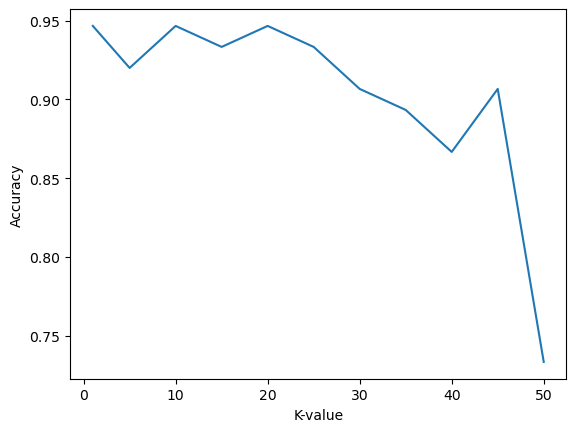

In [9]:
import matplotlib.pyplot as plt

accuracy_curve = np.array(accuracy_curve)
plt.plot(accuracy_curve[:, 0], accuracy_curve[:, 1])
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()

For this test set, increasing K past a certain point severely lowers the number of correctly classified samples. E.g. when k is increased past 35, the virginica points become more often misclassified as versicolor points and vice versa. This suggests that the two types are intrinsically similar, and increasing the radius of neighbors would catch those large clusters of both class types whilst increasing the chances of misclassification. When k = 50, more virginica points are misclassified than classified correctly.